In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wE8st1CD5cknae9mj0ooayPOqN_yfSnFsgkA4EeIk7XD_R_nOcSTkY
Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/Web\ Mining/data
path = '/content/drive/My Drive/Web Mining/data'

twitter-stayhometag-10000-january.json	twitter-stayhometag.json
twitter-stayhometag-10000-march.json


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Import Data

In [ ]:
all = pd.read_json(path + "/twitter-stayhometag.json")
january = pd.read_json(path + "/twitter-stayhometag-10000-january.json")
march = pd.read_json(path + "/twitter-stayhometag-10000-march.json")

In [ ]:
janMarch = pd.concat([january, march], axis=0) # เอาข้อมูลเดือน january รวมกับ march

In [ ]:
janMarch["date"] = pd.to_datetime(janMarch["date"]) # เปลี่ยน type ของ column date ให้เป็น datetime

# 1. แสดงจำนวนครั้งของ Tweet ที่มีคำว่า covid ในแต่ละวัน (ที่มีให้ในข้อมูล)

In [ ]:
covidText = janMarch[janMarch["tweet"].str.contains("covid")] # เลือกข้อมูลที่ column tweet เฉพาะอันที่มีคำว่า covid

In [ ]:
groupByDate = covidText.groupby("date")["date"].count() # จับกลุ่มข้อมูลตามวันที่และนับจำนวนข้อมูลของแต่ละกลุ่ม
groupByDate

date
2020-05-20    430
Name: date, dtype: int64

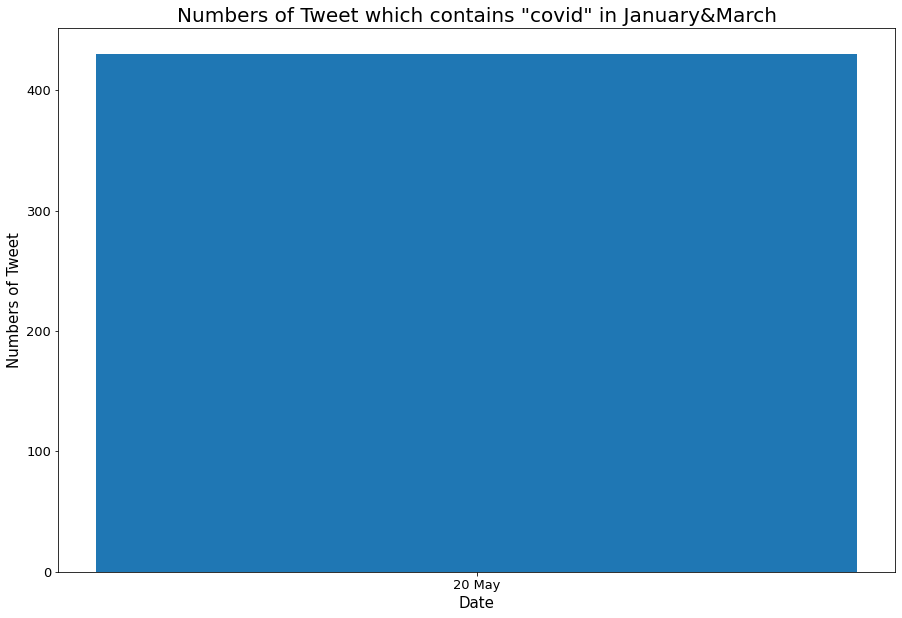

In [ ]:
x = groupByDate.keys().strftime("%d %b") # ข้อมูลแกน x (เปลี่ยนรูปแบบการแสดงผลของวันเป็น วันที่-ชื่อย่อเดือน)
y = groupByDate # ข้อมูลแกน y

plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.title("Numbers of Tweet which contains \"covid\" in January&March", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Numbers of Tweet", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# 2. แสดงชื่อ User ที่ Tweet หรือใช้ hashtag คำว่า covid หรือ stayathome มากที่สุด 10 อันดับ

In [ ]:
data2 = janMarch
data2.head()

id      conversation_id  ... trans_dest strHashtags
0  1212316251059605504  1212316251059605504  ...                       
1  1212167468900323328  1212167468900323328  ...                       
2  1212167233818046465  1212167233818046464  ...                       
3  1212167187437363200  1211661295952506880  ...                       
4  1212166887955668992  1212166887955668992  ...                       

[5 rows x 35 columns]

In [ ]:
# เปลี่ยนข้อมูลใน column hashtags จาก list เป็น string
strList = []
for i in data2["hashtags"]:
  string = " ".join(i)
  strList.append(sring)

data2["strHashtags"] = strList # สร้าง column ใหม่ชื่อ strHashtags และเอาข้อมูลที่แปลงแล้วมาใส่

In [ ]:
covidStayathome = data2[data2["tweet"].str.contains("covid","stayathome") | data2["strHashtags"].str.contains("covid","stayathome")] # เลือกข้อมูลที่ column tweet ที่มีคำว่า covid, stayathome หรือ column strHashtags ที่มีคำว่า covid, stayathome
covidStayathome = covidStayathome.loc[:,["username","tweet","strHashtags"]] # ตัดข้อมูลมาเฉพาะ column username, tweet, strHashtags

In [ ]:
#group result by username and sort top 10 username
groupByUsername = covidStayathome.groupby("username")["username"].count() # นับจำนวนครั้งการ tweet ของแต่ละ user
topTenUser = groupByUsername.sort_values().tail(10) # sort ข้อมูลจากน้อยไปมากและตัดมาเฉพาะ 10 อันดับสุดท้าย (เพราะตอนเอาไปทำกราฟ barh มันจะกลับกัน)

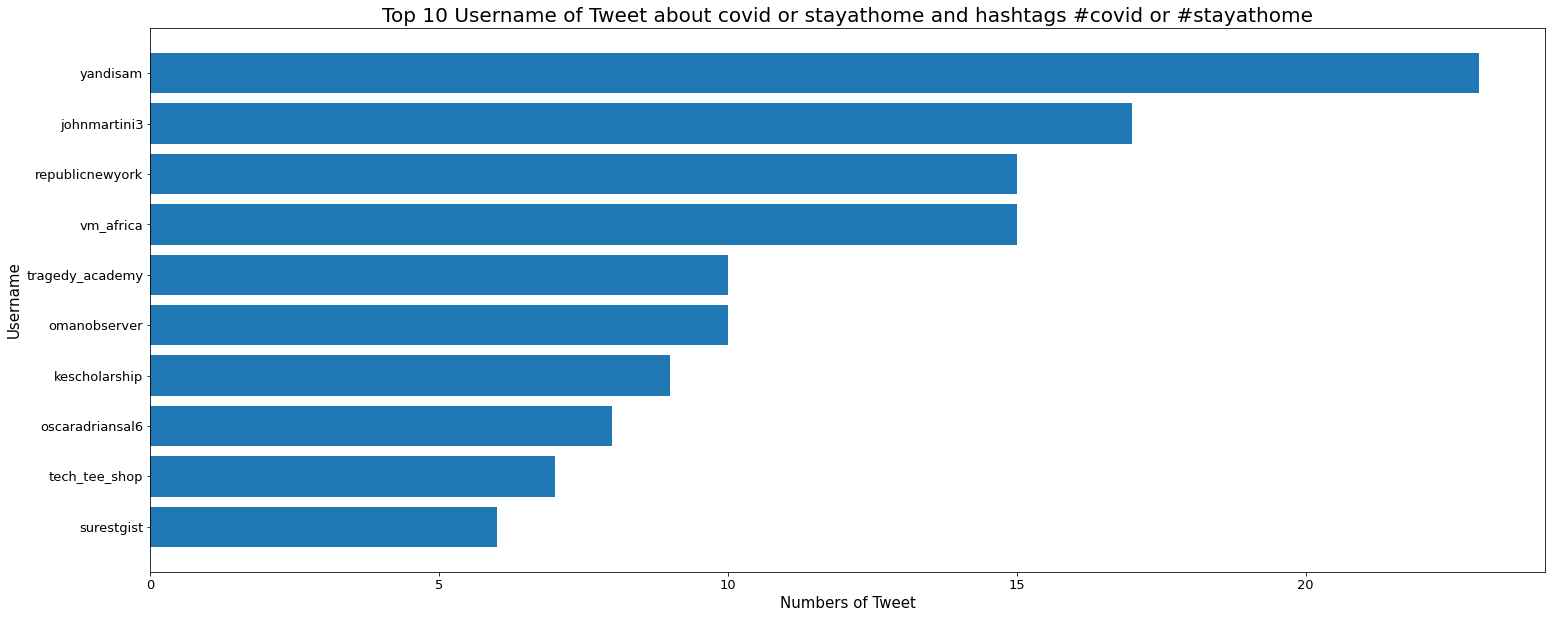

In [ ]:
x = topTenUser.keys() # ข้อมูลแกน x
y = topTenUser # ข้อมูลแกน y

plt.figure(figsize=(25,10))
plt.barh(x,y)
plt.title("Top 10 Username of Tweet about covid or stayathome and hashtags #covid or #stayathome", fontsize=20)
plt.xlabel("Numbers of Tweet", fontsize=15)
plt.ylabel("Username", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()